In [56]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

import utils_code.park_visits_change_rate as pvcr

# inline plot settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# plt.style.use("seaborn")

# autoreload settings (for modules)
%load_ext autoreload
%autoreload 2

# turn off certain warning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# the major park types that attracted about 90% of the total visits
major_park_types = ['Community Park', 'Flagship Park', 'Jointly Operated Playground', 'Nature Area',
                    'Neighborhood Park', 'Playground', 'Recreation Field/Courts', 'Triangle/Plaza']

## Read park visits change rate data

In [4]:
park_visits_change = pd.read_csv("../data/park_visits_change_rate/park_visits_change.csv")
park_visitors_change = pd.read_csv("../data/park_visits_change_rate/park_visitors_change.csv")
park_us_visitors_change = pd.read_csv("../data/park_visits_change_rate/park_us_visitors_change.csv")
park_local_visitors_change = pd.read_csv("../data/park_visits_change_rate/park_local_visitors_change.csv")

In [19]:
for pvc in [park_visits_change, park_visitors_change, park_us_visitors_change, park_local_visitors_change]:
    
    # change certain columns' type to category
    pvc['park_type'] = pvc['park_type'].astype('category')
    pvc['borough'] = pvc['borough'].astype('category')
    pvc['month'] = pvc['month'].astype('category')

In [20]:
park_visits_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8156 entries, 0 to 8155
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   park_name              8156 non-null   object  
 1   park_type              8156 non-null   category
 2   borough                8156 non-null   category
 3   month                  8156 non-null   category
 4   raw_visit_counts_2019  8156 non-null   float64 
 5   TAVG_2019              8156 non-null   float64 
 6   raw_visit_counts_2020  8156 non-null   float64 
 7   TAVG_2020              8156 non-null   float64 
 8   visits_adj_rate        8156 non-null   float64 
 9   visits_base_adjtd      8156 non-null   float64 
 10  visit_change_rate      8156 non-null   float64 
dtypes: category(3), float64(7), object(1)
memory usage: 534.7+ KB


## Park visitors change rate by borough

### All Visits

In [28]:
data = park_visits_change
groupby_cols = ['borough', 'month']
value_cols = ['visits_base_adjtd', 'raw_visit_counts_2020']
topic = 'borough'
test_method = 'wilcoxon'

summary_visits = pvcr.summary_by_topic(data, groupby_cols, value_cols, topic, test_method)

In [29]:
res_df_visits, group_letters_visits = pvcr.tukeyhsd_test(summary_visits, 'visits_change_rate', 'borough', filter_month=True)

In [40]:
summary_visits

visits_2019  visits_2020  visits_change_rate  \
borough         month                                                   
Bronx           1      211195.361855     201606.0                -4.5   
                2      187079.133875     162083.0               -13.4   
                3      265914.751538     147489.0               -44.5   
                4      260769.156257      80958.0               -69.0   
                5      288567.499304     111473.0               -61.4   
...                              ...          ...                 ...   
Upper Manhattan 8      128067.633328      60183.0               -53.0   
                9      125956.518846      63643.0               -49.5   
                10     136682.899425      66800.0               -51.1   
                11     112746.033154      47136.0               -58.2   
                12      91609.079479      41163.0               -55.1   

                       test_stat       p_value  
borough         month                           
Bronx           1         2291.0  1.988637e-05  
                2         1200.0  1.530163e-11  
                3          140.0  8.220631e-21  
                4            0.0  1.389452e-22  
                5          123.0  2.476259e-21  
...                          ...           ...  
Upper Manhattan 8            0.0  3.525498e-12  
                9            3.0  8.775420e-12  
                10          35.0  8.005964e-12  
                11           3.0  4.063868e-12  
                12           1.0  3.696686e-12  

[72 rows x 5 columns]

### All Visitors

In [31]:
data = park_visitors_change
groupby_cols = ['borough', 'month']
value_cols = ['visits_base_adjtd', 'raw_visitor_counts_2020']
topic = 'borough'
test_method = 'wilcoxon'

summary_visitors = pvcr.summary_by_topic(data, groupby_cols, value_cols, topic, test_method)

In [32]:
res_df_visitors, group_letters_visitors = pvcr.tukeyhsd_test(summary_visitors, 'visits_change_rate', 'borough', filter_month=True)

In [33]:
summary_visitors

visits_2019  visits_2020  visits_change_rate  \
borough         month                                                   
Bronx           1       86797.158582      84960.0                -2.1   
                2       81663.946275      77133.0                -5.5   
                3      111830.649615      70758.0               -36.7   
                4      115642.262351      33524.0               -71.0   
                5      134258.245597      50551.0               -62.3   
...                              ...          ...                 ...   
Upper Manhattan 8       68581.430740      30632.0               -55.3   
                9       60217.311959      31514.0               -47.7   
                10      63185.192516      32267.0               -48.9   
                11      55705.928781      24037.0               -56.9   
                12      45320.532340      19820.0               -56.3   

                       test_stat       p_value  
borough         month                           
Bronx           1         1987.0  3.550192e-07  
                2         2291.0  1.902896e-04  
                3          163.0  1.403054e-20  
                4            0.0  2.964380e-22  
                5          121.0  3.530487e-21  
...                          ...           ...  
Upper Manhattan 8            6.0  4.682600e-12  
                9            1.0  5.423479e-12  
                10          86.0  1.772274e-10  
                11           4.0  6.265055e-12  
                12           0.0  5.168395e-12  

[72 rows x 5 columns]

### All US Visitors

In [34]:
data = park_us_visitors_change
groupby_cols = ['borough', 'month']
value_cols = ['visits_base_adjtd', 'visitor_count_2020']
topic = 'borough'
test_method = 'wilcoxon'

summary_us_visitors = pvcr.summary_by_topic(data, groupby_cols, value_cols, topic, test_method)

In [35]:
res_df_us_visitors, group_letters_us_visitors = pvcr.tukeyhsd_test(summary_us_visitors, 'visits_change_rate', 'borough', filter_month=True)

### Local visitors

In [36]:
data = park_local_visitors_change
groupby_cols = ['borough', 'month']
value_cols = ['visits_base_adjtd', 'visitor_count_2020']
topic = 'borough'
test_method = 'wilcoxon'

summary_local_visitors = pvcr.summary_by_topic(data, groupby_cols, value_cols, topic, test_method)

In [38]:
res_df_local_visitors, group_letters_local_visitors = pvcr.tukeyhsd_test(summary_local_visitors, 'visits_change_rate', 'borough', filter_month=True)

In [39]:
# percentage change in April
summary_local_visitors.xs(4, level=1)

,visits_2019,visits_2020,visits_change_rate,test_stat,p_value
borough,,,,,
Bronx,67576.810473,21747.0,-67.8,1.0,3.036842e-22
Brooklyn,93976.845811,31184.0,-66.8,0.0,1.550236e-36
Lower Manhattan,45636.228204,6579.0,-85.6,0.0,5.143754e-11
Queens,78541.614175,22546.0,-71.3,0.0,3.590074e-28
Staten Island,17448.204607,7898.0,-54.7,39.0,1.127658e-10
Upper Manhattan,37339.231024,11145.0,-70.2,1.0,2.520033e-12


### Plot with Tukey HSD test results

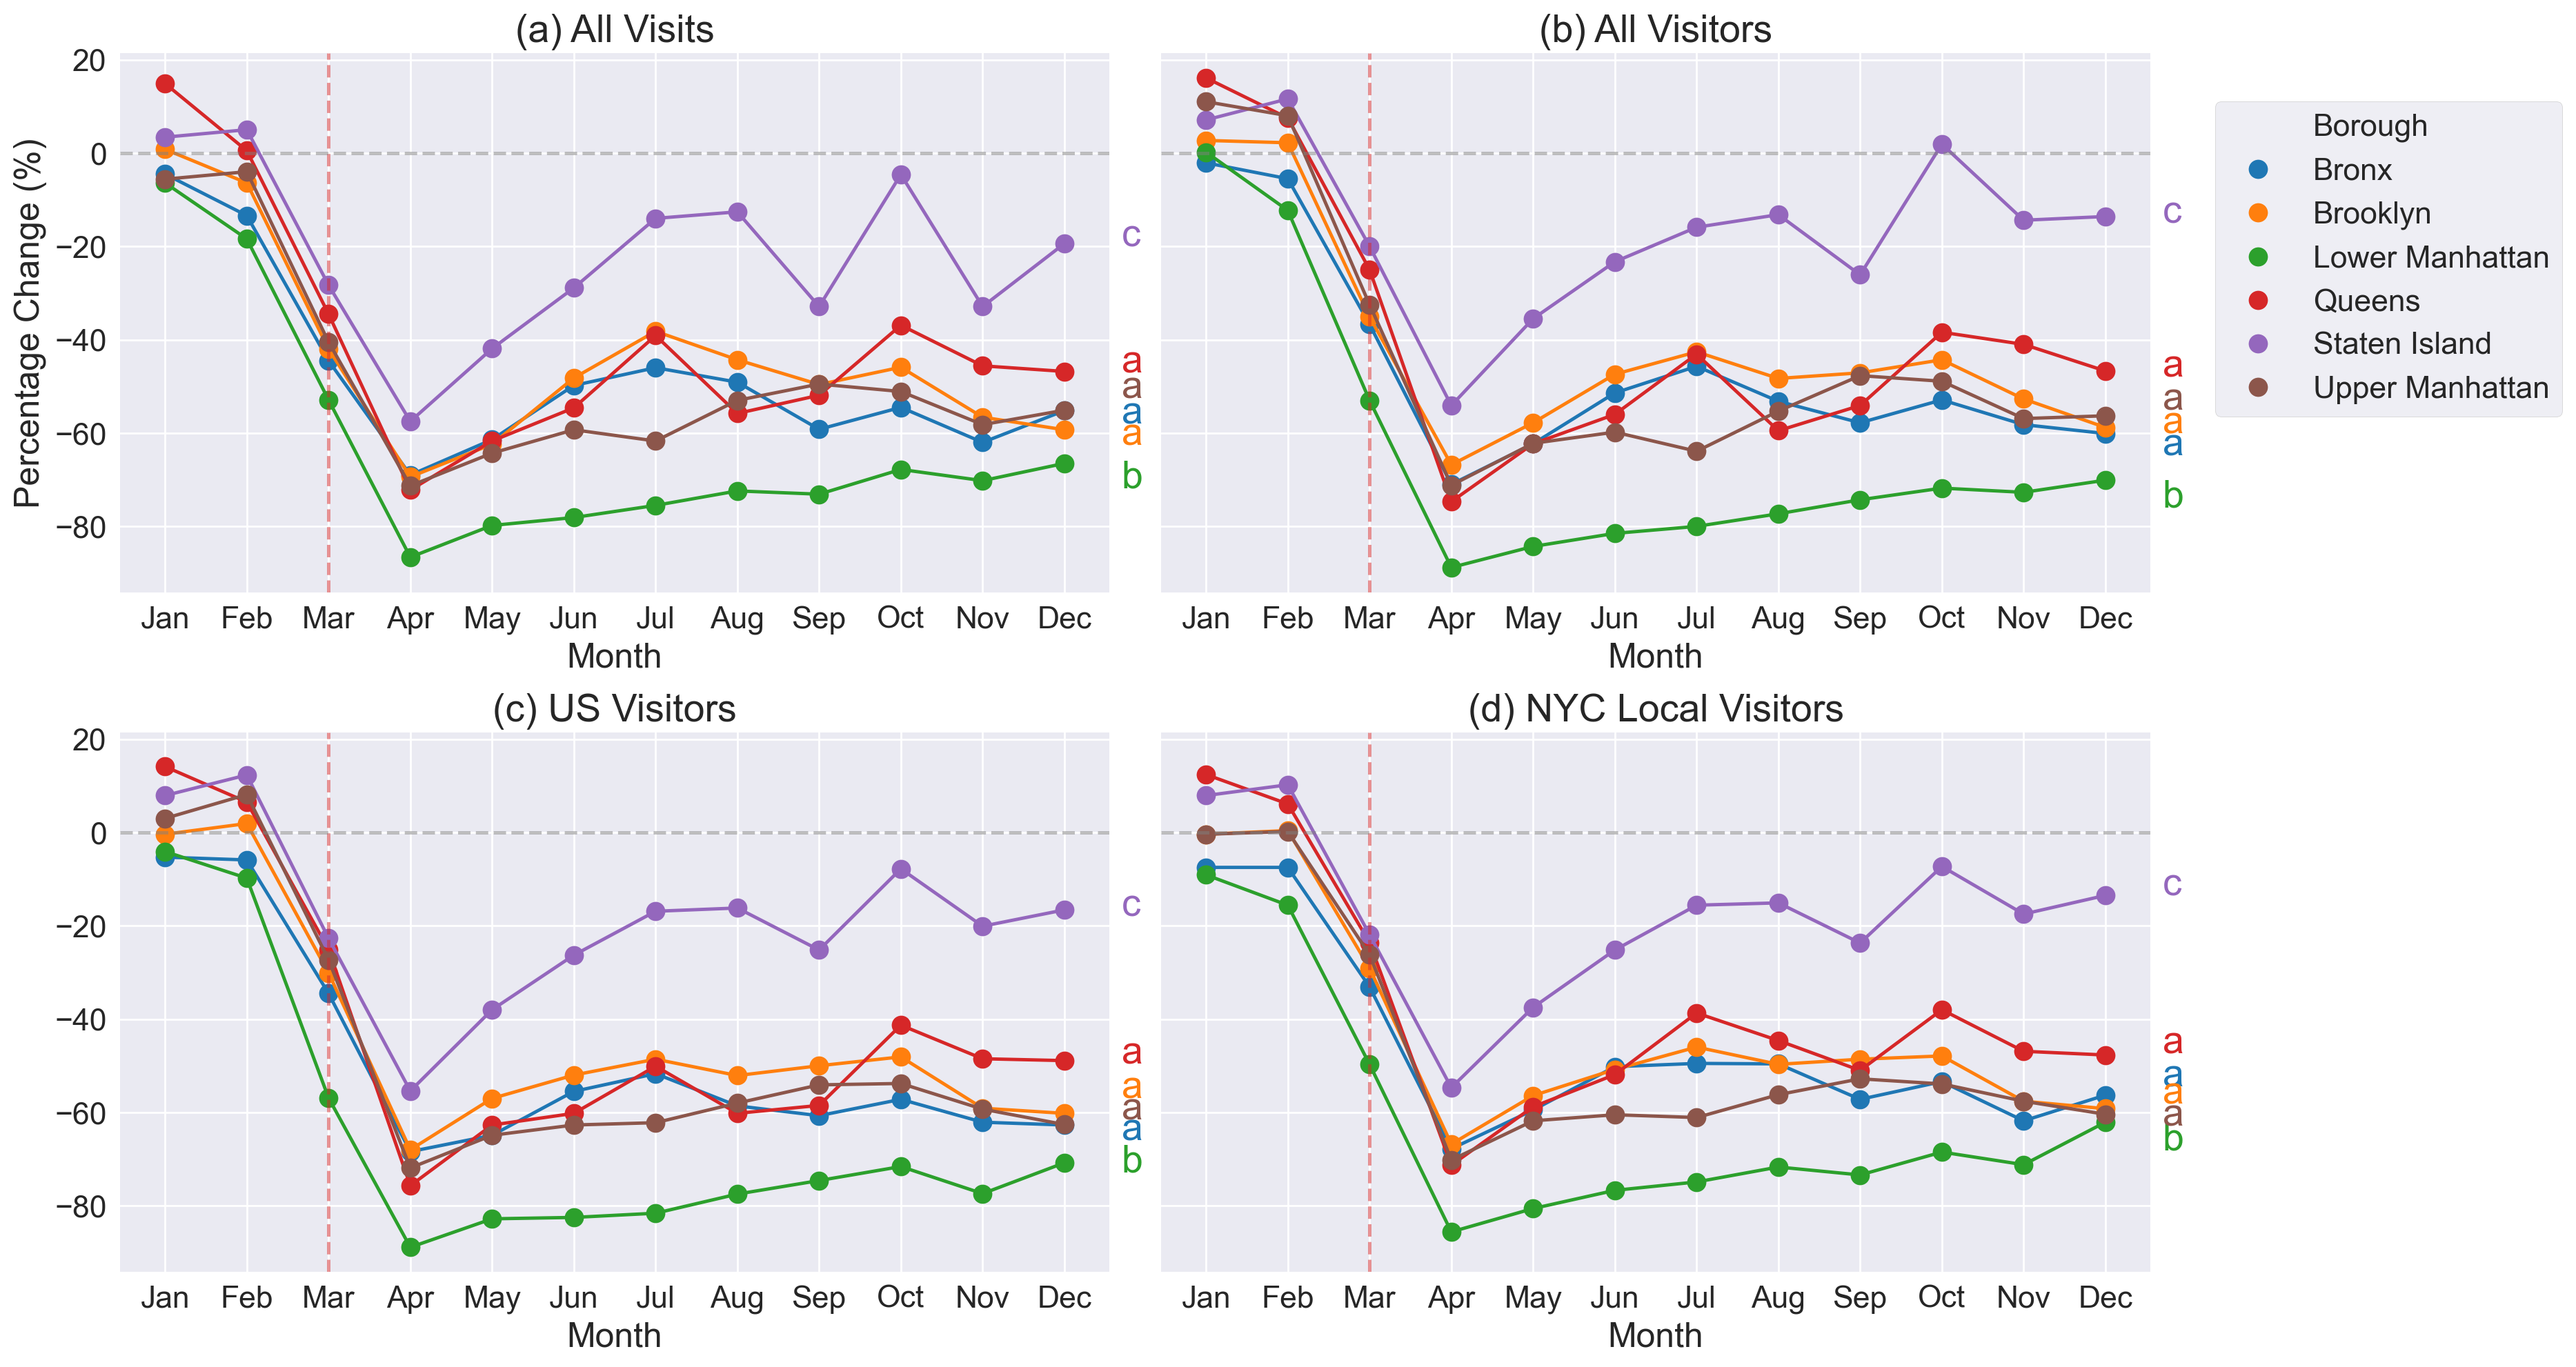

In [113]:
datasets = [summary_visits, summary_visitors, summary_us_visitors, summary_local_visitors]
labels = [group_letters_visits, group_letters_visitors, group_letters_us_visitors, group_letters_local_visitors]
titles = ['(a) All Visits', '(b) All Visitors', '(c) US Visitors', '(d) NYC Local Visitors']
topic_label = 'Borough'

text_locs = pvcr.plot_by_topic(datasets, labels, titles, topic_label, text_locs)

In [112]:
# manually adjust the label locations here
text_locs[0]['yloc_adjt'] = [-20.0, -47.0, -52.5, -58.0, -62.5, -71.8]
text_locs[1]['yloc_adjt'] = [-15.0, -48.0, -55.0, -60.0, -64.8, -75.8]
text_locs[2]['yloc_adjt'] = [-18.0, -49.5, -57.0, -61.5, -66.0, -72.8]
text_locs[3]['yloc_adjt'] = [-13.5, -47.4, -54.5, -58.2, -62.8, -68.0]

### Test if there is any statistically difference between the four datasets

In [72]:
datasets = [summary_visits, summary_visitors, summary_us_visitors, summary_local_visitors]
data_types = ['visits', 'visitors', 'us_visitors', 'local_visitors']

summary_all = []

for i, summary in enumerate(datasets):
    
    summary_pivot = summary.reset_index().pivot(index=['month'], columns=['borough'], values=['visits_change_rate']).reset_index().droplevel(level=0, axis=1)
    summary_pivot.rename(columns={'':'month'}, inplace=True)
    summary_pivot['data_type'] = data_types[i]
    
    summary_all.append(summary_pivot)
    
summary_all = pd.concat(summary_all)
summary_all = summary_all.set_index(['data_type','month'])

comparison_results = []

for column in summary_all.columns:
    
    res_df, group_letters = pvcr.tukeyhsd_test(summary_all, column, 'data_type')
    group_letters.rename(columns={'label':column}, inplace=True)
    comparison_results.append(group_letters)
    
comparison_results = pd.concat(comparison_results, axis=1)

In [73]:
comparison_results

,Bronx,Brooklyn,Lower Manhattan,Queens,Staten Island,Upper Manhattan
local_visitors,a,a,a,a,a,a
us_visitors,a,a,a,a,a,a
visitors,a,a,a,a,a,a
visits,a,a,a,a,a,a


### Simple Summary

In [41]:
data = park_visits_change
topic_col = 'borough'
value_cols = ['visits_base_adjtd', 'raw_visit_counts_2020']

summary = pvcr.summary_by_topic_simple(data, topic_col, value_cols)

In [42]:
summary

,visits_2019,visits_2020,visits_change_rate
borough,,,
Bronx,2.856302e+06,1465439.0,-48.7
Brooklyn,3.906940e+06,2193768.0,-43.8
Lower Manhattan,2.045406e+06,772235.0,-62.2
Queens,3.707002e+06,2121966.0,-42.8
Staten Island,7.141153e+05,551207.0,-22.8
Upper Manhattan,1.608438e+06,829048.0,-48.5


## Park visits change rate by park type

### All Visits

In [43]:
data = park_visits_change
groupby_cols = ['park_type', 'month']
value_cols = ['visits_base_adjtd', 'raw_visit_counts_2020']
topic = 'park_type'
test_method = 'wilcoxon'

summary_visits = pvcr.summary_by_topic(data, groupby_cols, value_cols, topic, test_method)

In [44]:
res_df_visits, group_letters_visits = pvcr.tukeyhsd_test(summary_visits, 'visits_change_rate', 'park_type', filter_month=True)

In [45]:
# percentage change in April
summary_visits.xs(4, level=1)

,visits_2019,visits_2020,visits_change_rate,test_stat,p_value
park_type,,,,,
Community Park,242603.572462,71120.0,-70.7,0.0,2.462831e-14
Flagship Park,256358.148586,52692.0,-79.4,0.0,2.441406e-04
Jointly Operated Playground,182069.196530,46987.0,-74.2,0.0,2.459927e-28
Nature Area,42234.704901,21681.0,-48.7,6.0,8.149073e-10
Neighborhood Park,209601.467266,68998.0,-67.1,0.0,1.745308e-29
Playground,146513.885426,50141.0,-65.8,0.0,1.079222e-26
Recreation Field/Courts,43685.621261,15111.0,-65.4,0.0,2.910383e-11
Triangle/Plaza,79853.109950,12694.0,-84.1,0.0,2.910383e-11


### All Visitors

In [46]:
data = park_visitors_change
groupby_cols = ['park_type', 'month']
value_cols = ['visits_base_adjtd', 'raw_visitor_counts_2020']
topic = 'park_type'
test_method = 'wilcoxon'

summary_visitors = pvcr.summary_by_topic(data, groupby_cols, value_cols, topic, test_method)

In [47]:
res_df_visitors, group_letters_visitors = pvcr.tukeyhsd_test(summary_visitors, 'visits_change_rate', 'park_type', filter_month=True)

### US Visitors

In [48]:
data = park_us_visitors_change
groupby_cols = ['park_type', 'month']
value_cols = ['visits_base_adjtd', 'visitor_count_2020']
topic = 'park_type'
test_method = 'wilcoxon'

summary_us_visitors = pvcr.summary_by_topic(data, groupby_cols, value_cols, topic, test_method)

In [49]:
res_df_us_visitors, group_letters_us_visitors = pvcr.tukeyhsd_test(summary_us_visitors, 'visits_change_rate', 'park_type', filter_month=True)

### Local Visitors

In [50]:
data = park_local_visitors_change
groupby_cols = ['park_type', 'month']
value_cols = ['visits_base_adjtd', 'visitor_count_2020']
topic = 'park_type'
test_method = 'wilcoxon'

summary_local_visitors = pvcr.summary_by_topic(data, groupby_cols, value_cols, topic, test_method)

In [51]:
res_df_local_visitors, group_letters_local_visitors = pvcr.tukeyhsd_test(summary_local_visitors, 'visits_change_rate', 'park_type', filter_month=True)

In [52]:
summary_local_visitors.xs(4,level=1)

,visits_2019,visits_2020,visits_change_rate,test_stat,p_value
park_type,,,,,
Community Park,73556.282205,24286.0,-67.0,0.0,2.462831e-14
Flagship Park,61029.389528,12990.0,-78.7,0.0,2.441406e-04
Jointly Operated Playground,47340.075839,13059.0,-72.4,0.0,2.459927e-28
Nature Area,10800.180742,5991.0,-44.5,31.0,1.382432e-07
Neighborhood Park,62158.885947,20151.0,-67.6,0.0,1.745308e-29
Playground,42387.668462,13436.0,-68.3,0.0,1.079222e-26
Recreation Field/Courts,16051.653164,6549.0,-59.2,0.0,2.910383e-11
Triangle/Plaza,27194.798406,4637.0,-82.9,0.0,2.910383e-11


In [53]:
summary_local_visitors.xs(7,level=1)

,visits_2019,visits_2020,visits_change_rate,test_stat,p_value
park_type,,,,,
Community Park,94567.863855,47787.0,-49.5,91.0,2.857677e-12
Flagship Park,87439.236812,33425.0,-61.8,1.0,4.882812e-04
Jointly Operated Playground,41475.110817,22713.0,-45.2,31.0,2.950194e-27
Nature Area,12412.777262,16012.0,29.0,170.0,2.860868e-02
Neighborhood Park,67994.391656,37368.0,-45.0,142.0,2.143492e-28
Playground,45036.961095,25070.0,-44.3,2.0,1.122901e-26
Recreation Field/Courts,15835.700600,11425.0,-27.9,41.0,4.596543e-06
Triangle/Plaza,31163.973014,7737.0,-75.2,6.0,8.149073e-10


### Plot with Tukey HSD test results

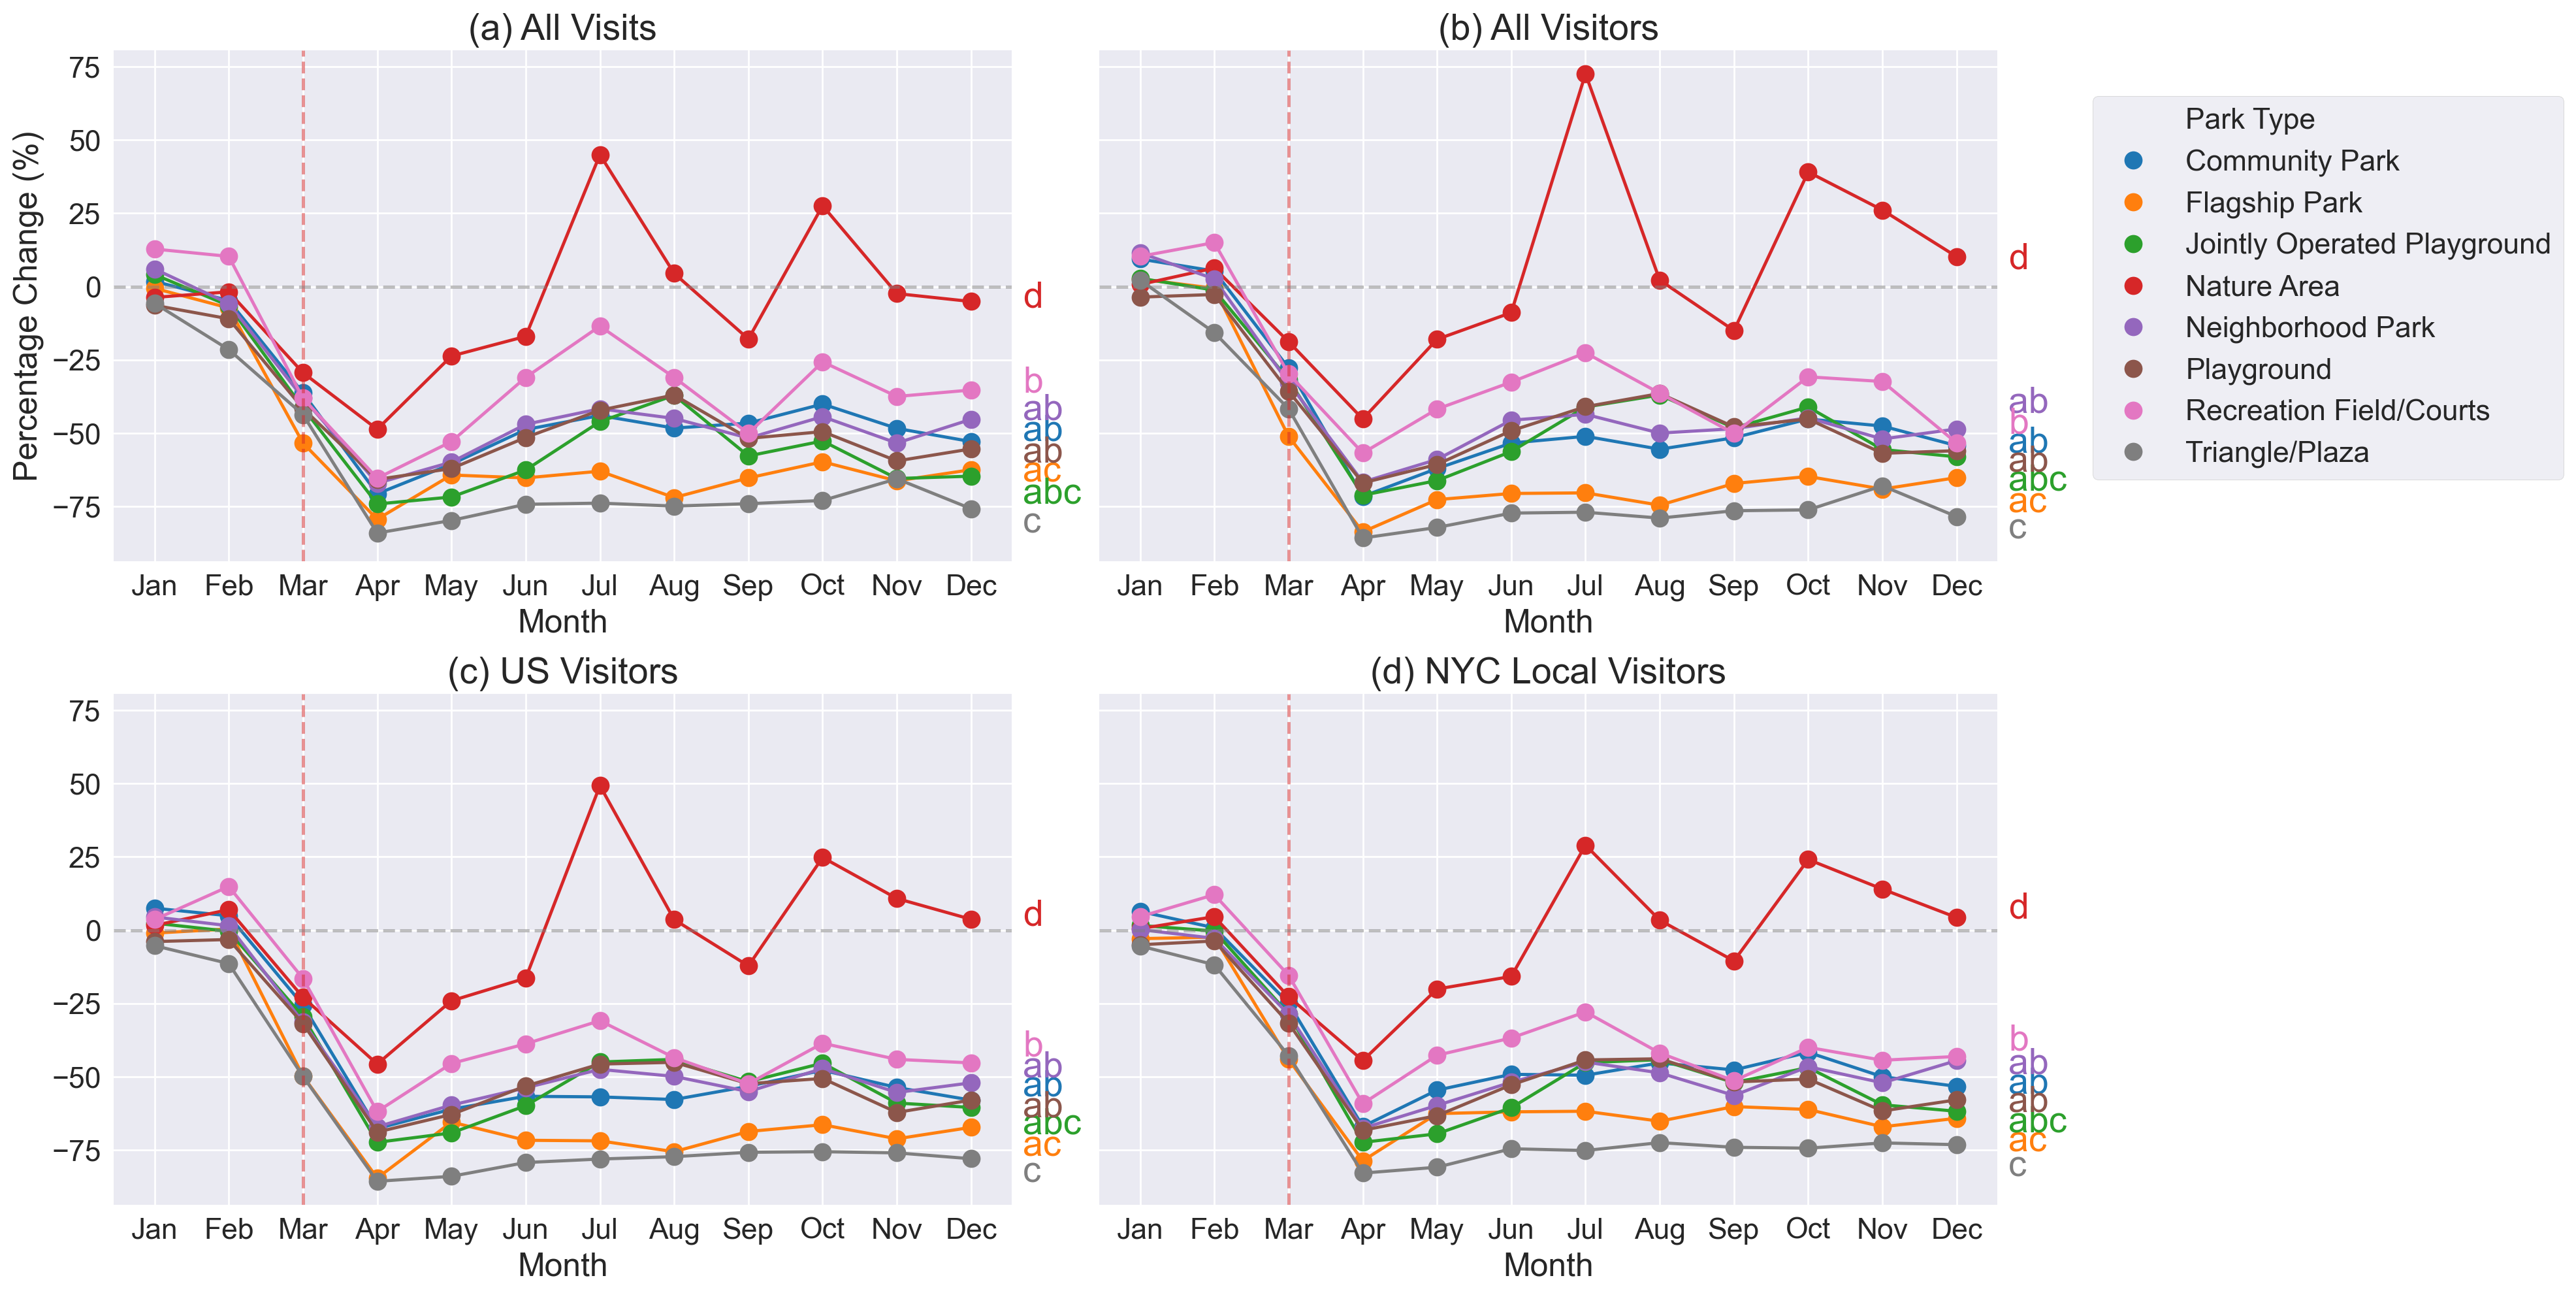

In [19]:
datasets = [summary_visits, summary_visitors, summary_us_visitors, summary_local_visitors]
labels = [group_letters_visits, group_letters_visitors, group_letters_us_visitors, group_letters_local_visitors]
titles = ['(a) All Visits', '(b) All Visitors', '(c) US Visitors', '(d) NYC Local Visitors']
topic_label = 'Park Type'

text_locs = pvcr.plot_by_topic(datasets, labels, titles, topic_label, text_locs)

In [18]:
text_locs[0]['yloc_adjt'] = [-7.0,-36.0,-45.3,-52.5,-60.0,-66.6,-74.0,-84.0]
text_locs[1]['yloc_adjt'] = [6.0,-43.0,-50.0,-56.5,-63.0,-69.5,-77.0,-86.0]
text_locs[2]['yloc_adjt'] = [1.6,-43.0,-50.1,-56.5,-63.6,-69.5,-77.0,-86.0]
text_locs[3]['yloc_adjt'] = [4.0,-41.0,-49.0,-55.6,-62.0,-68.8,-75.5,-84.0]

### Test if there is any statistically difference between the four datasets

In [66]:
datasets = [summary_visits, summary_visitors, summary_us_visitors, summary_local_visitors]
data_types = ['visits', 'visitors', 'us_visitors', 'local_visitors']

summary_all = []

for i, summary in enumerate(datasets):
    
    summary_pivot = summary.reset_index().pivot(index=['month'], columns=['park_type'], values=['visits_change_rate']).reset_index().droplevel(level=0, axis=1)
    summary_pivot.rename(columns={'':'month'}, inplace=True)
    summary_pivot['data_type'] = data_types[i]
    
    summary_all.append(summary_pivot)
    
summary_all = pd.concat(summary_all)
summary_all = summary_all.set_index(['data_type','month'])

comparison_results = []

for column in summary_all.columns:
    
    res_df, group_letters = pvcr.tukeyhsd_test(summary_all, column, 'data_type')
    group_letters.rename(columns={'label':column}, inplace=True)
    comparison_results.append(group_letters)
    
comparison_results = pd.concat(comparison_results, axis=1)

In [67]:
comparison_results

,Community Park,Flagship Park,Jointly Operated Playground,Nature Area,Neighborhood Park,Playground,Recreation Field/Courts,Triangle/Plaza
local_visitors,a,a,a,a,a,a,a,a
us_visitors,a,a,a,a,a,a,a,a
visitors,a,a,a,a,a,a,a,a
visits,a,a,a,a,a,a,a,a


### Simple Summary

In [143]:
data = park_local_visitors_change_cat_filtered
topic_col = 'park_type'
value_cols = ['visits_base_adjtd', 'visitor_count_2020']

summary = pvcr.summary_by_topic_simple(data, topic_col, value_cols)

In [144]:
summary

,visits_2019,visits_2020,visits_change_rate
park_type,,,
Community Park,889137.009193,516643.0,-41.9
Flagship Park,783070.584089,336858.0,-57.0
Jointly Operated Playground,587070.231623,323367.0,-44.9
Nature Area,145562.099775,140373.0,-3.6
Neighborhood Park,869831.798791,502415.0,-42.2
Playground,540552.424007,300884.0,-44.3
Recreation Field/Courts,193032.303715,127963.0,-33.7
Triangle/Plaza,346660.977178,128544.0,-62.9
